In [ ]:
import pandas as pd
df = pd.read_csv('plant_growth_data_1000_rows.csv')

df.head()

,id,water,sunlight,temperature,fertilizer,area,soil_quality,rainfall,yield
0,1,150.0,8.0,22.0,NaN,105.0,NaN,100.0,3.3
1,2,150.0,NaN,22.0,28.0,130.0,9.0,112.0,4.1
2,3,160.0,9.0,24.0,28.0,130.0,8.0,104.0,3.0
3,4,NaN,8.0,NaN,NaN,105.0,8.0,105.0,3.9
4,5,160.0,7.0,24.0,31.0,110.0,6.0,100.0,3.0


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving plant_growth_data_1000_rows.csv to plant_growth_data_1000_rows.csv


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('plant_growth_data_1000_rows.csv')
data1=df.copy()

scaler = MinMaxScaler()
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
print(df.head())
print(data1.head())

         id  water  sunlight  temperature  fertilizer   area  soil_quality  \
0  0.000000   0.25      0.50     0.166667         NaN  0.125           NaN   
1  0.001001   0.25       NaN     0.166667         0.0  0.750      1.000000   
2  0.002002   0.50      0.75     0.500000         0.0  0.750      0.666667   
3  0.003003    NaN      0.50          NaN         NaN  0.125      0.666667   
4  0.004004   0.50      0.25     0.500000         0.6  0.250      0.000000   

   rainfall   yield  
0  0.277778  0.3750  
1  0.944444  0.8750  
2  0.500000  0.1875  
3  0.555556  0.7500  
4  0.277778  0.1875  
   id  water  sunlight  temperature  fertilizer   area  soil_quality  \
0   1  150.0       8.0         22.0         NaN  105.0           NaN   
1   2  150.0       NaN         22.0        28.0  130.0           9.0   
2   3  160.0       9.0         24.0        28.0  130.0           8.0   
3   4    NaN       8.0          NaN         NaN  105.0           8.0   
4   5  160.0       7.0         24.0    

In [ ]:
!pip install tensorflow

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, Model
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd


data = df.copy()

mask = data.isnull()
print("Missing values in each column:")
print(mask.sum())


df_filled = data.fillna(data.mean())

print(df_filled.head())

Missing values in each column:
id                0
water           148
sunlight        167
temperature     166
fertilizer      143
area              0
soil_quality    215
rainfall        112
yield            63
dtype: int64
         id     water  sunlight  temperature  fertilizer   area  soil_quality  \
0  0.000000  0.250000  0.500000     0.166667    0.492415  0.125      0.477707   
1  0.001001  0.250000  0.492497     0.166667    0.000000  0.750      1.000000   
2  0.002002  0.500000  0.750000     0.500000    0.000000  0.750      0.666667   
3  0.003003  0.516725  0.500000     0.504596    0.492415  0.125      0.666667   
4  0.004004  0.500000  0.250000     0.500000    0.600000  0.250      0.000000   

   rainfall   yield  
0  0.277778  0.3750  
1  0.944444  0.8750  
2  0.500000  0.1875  
3  0.555556  0.7500  
4  0.277778  0.1875  


In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

class Generator(nn.Module):
    def __init__(self, input_size, output_size):
        super(Generator, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_size, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, output_size),
            nn.Tanh()  # Keep Tanh for the output layer
        )

    def forward(self, x):
        return self.fc(x)

class Discriminator(nn.Module):
    def __init__(self, input_size):
        super(Discriminator, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_size, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.fc(x)

def initialize_weights(model):
    for m in model.modules():
        if isinstance(m, nn.Linear):
            nn.init.xavier_uniform_(m.weight)
            nn.init.constant_(m.bias, 0)

def train_gan(df, epochs=5000, batch_size=64):
    input_size = df.shape[1]
    generator = Generator(input_size, input_size)
    discriminator = Discriminator(input_size)
    initialize_weights(generator)
    initialize_weights(discriminator)

    criterion = nn.BCELoss()
    optim_gen = optim.Adam(generator.parameters(), lr=0.0001, betas=(0.5, 0.999))
    optim_disc = optim.Adam(discriminator.parameters(), lr=0.0001, betas=(0.5, 0.999))

    scaler = MinMaxScaler(feature_range=(-1, 1))
    normalized_data = scaler.fit_transform(df.values)
    real_data = torch.tensor(normalized_data, dtype=torch.float32)

    for epoch in range(epochs):
        for i in range(0, len(df), batch_size):
            batch_data = real_data[i:i+batch_size]
            batch_size_actual = batch_data.size(0)
            real_labels = torch.ones(batch_size_actual, 1)
            fake_labels = torch.zeros(batch_size_actual, 1)

            # Train Discriminator
            optim_disc.zero_grad()
            real_output = discriminator(batch_data)
            d_loss_real = criterion(real_output, real_labels)

            noise = torch.randn(batch_size_actual, input_size)
            fake_data = generator(noise)
            fake_output = discriminator(fake_data.detach())
            d_loss_fake = criterion(fake_output, fake_labels)

            d_loss = d_loss_real + d_loss_fake
            d_loss.backward()
            torch.nn.utils.clip_grad_norm_(discriminator.parameters(), max_norm=1.0)
            optim_disc.step()

            # Train Generator
            optim_gen.zero_grad()
            fake_output = discriminator(fake_data)
            g_loss = criterion(fake_output, real_labels)
            g_loss.backward()
            torch.nn.utils.clip_grad_norm_(generator.parameters(), max_norm=1.0)
            optim_gen.step()

        if epoch % 100 == 0:
            print(f'Epoch [{epoch}/{epochs}], d_loss: {d_loss.item():.4f}, g_loss: {g_loss.item():.4f}')

    return generator

def impute_missing_values(df, generator, scaler):
    """
    Use the trained GAN generator to impute missing values in the dataset.

    Args:
        df (pd.DataFrame): The original dataframe with missing values.
        generator (nn.Module): Trained GAN generator model.
        scaler (MinMaxScaler): Scaler used for normalizing data during training.

    Returns:
        pd.DataFrame: Dataframe with imputed values.
    """
    df_imputed = df.copy()
    input_size = df.shape[1]

    for index, row in df_imputed.iterrows():
        if row.isnull().any():

            row_values = row.fillna(row.mean()).values.reshape(1, -1)
            normalized_row = scaler.transform(row_values)
            normalized_row = torch.tensor(normalized_row, dtype=torch.float32)


            noise = torch.randn(1, input_size)
            generated_data = generator(noise).detach().numpy()


            generated_data = scaler.inverse_transform(generated_data)


            row_filled = np.where(row.isnull(), generated_data[0], row.values)


            row_filled = np.where(row_filled == 0, row.mean(), row_filled)

            df_imputed.loc[index] = row_filled

    return df_imputed

# Example usage
df = pd.read_csv('plant_growth_data_1000_rows.csv')


scaler = MinMaxScaler(feature_range=(-1, 1))
normalized_data = scaler.fit_transform(df.fillna(df.mean()).values)  # Fill NaN with column mean temporarily
df_normalized = pd.DataFrame(normalized_data, columns=df.columns)

generator = train_gan(df_normalized, epochs=1000)

df_imputed = impute_missing_values(df, generator, scaler)

# Print results
print("Original DataFrame:")
print(df)

print("\nImputed DataFrame:")
print(df_imputed)


Epoch [0/1000], d_loss: 1.2826, g_loss: 0.6776
Epoch [100/1000], d_loss: 1.2147, g_loss: 0.8675
Epoch [200/1000], d_loss: 1.2393, g_loss: 0.8072
Epoch [300/1000], d_loss: 1.4669, g_loss: 0.7009
Epoch [400/1000], d_loss: 1.2715, g_loss: 0.6486
Epoch [500/1000], d_loss: 1.3347, g_loss: 0.7591
Epoch [600/1000], d_loss: 1.0548, g_loss: 0.8207
Epoch [700/1000], d_loss: 1.4043, g_loss: 0.7660
Epoch [800/1000], d_loss: 1.2002, g_loss: 0.8562
Epoch [900/1000], d_loss: 1.3007, g_loss: 0.7568
Original DataFrame:
       id  water  sunlight  temperature  fertilizer   area  soil_quality  \
0       1  150.0       8.0         22.0         NaN  105.0           NaN   
1       2  150.0       NaN         22.0        28.0  130.0           9.0   
2       3  160.0       9.0         24.0        28.0  130.0           8.0   
3       4    NaN       8.0          NaN         NaN  105.0           8.0   
4       5  160.0       7.0         24.0        31.0  110.0           6.0   
..    ...    ...       ...          

In [ ]:
import pandas as pd
from tabulate import tabulate

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)


print("Imputed Dataset (Formatted Display):")
print(tabulate(df_imputed, headers='keys', tablefmt='plain'))


df_imputed.to_csv("imputed_dataset.csv", index=False)


Imputed Dataset (Formatted Display):
       id    water    sunlight    temperature    fertilizer    area    soil_quality    rainfall    yield
  0     1  150         8              22            31.4459     105         7.77735    100       3.3
  1     2  150         8.35587        22            28          130         9          112       4.1
  2     3  160         9              24            28          130         8          104       3
  3     4  161.954     8              22.4246       29.1841     105         8          105       3.9
  4     5  160         7              24            31          110         6          100       3
  5     6  180         7.62955        23            31          100         8.52082    105       2.7
  6     7  180         9              26            28.7325     120         7          112       3.9
  7     8  180         9              26            33          120         9          113       3.7
  8     9  140        10              21            29

In [ ]:
import pandas as pd

df = pd.read_csv('imputed_dataset.csv')
original_df = pd.read_csv('plant_growth_data_1000_rows.csv')

df = df.round().astype(int)

mask = original_df.isna()

def highlight_imputed(val, mask_row):
    return 'background-color: light blue; color: red;' if mask_row else ''

styled_df = df.style.apply(
    lambda row: [
        highlight_imputed(val, mask.iloc[row.name, col_idx])
        for col_idx, val in enumerate(row)
    ],
    axis=1
)

styled_df

,id,water,sunlight,temperature,fertilizer,area,soil_quality,rainfall,yield
0,1,150,8,22,31,105,8,100,3
1,2,150,8,22,28,130,9,112,4
2,3,160,9,24,28,130,8,104,3
3,4,162,8,22,29,105,8,105,4
4,5,160,7,24,31,110,6,100,3
5,6,180,8,23,31,100,9,105,3
6,7,180,9,26,29,120,7,112,4
7,8,180,9,26,33,120,9,113,4
8,9,140,10,21,29,130,7,95,4
9,10,150,9,26,32,115,6,113,3


In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Load your dataset
df_original = pd.read_csv('plant_growth_data_1000_rows.csv')

# Initialize the SimpleImputer (or any imputation method you prefer)
imputer = SimpleImputer(strategy='mean')  # Using mean imputation as an example

# Perform imputation and create the imputed DataFrame
df_imputed = pd.DataFrame(imputer.fit_transform(df_original), columns=df_original.columns)

# Now that df_imputed is defined, save it as a CSV
df_imputed.to_csv('imputed_dataset.csv', index=False)

# If you're working in Google Colab and want to download the file
from google.colab import files
files.download('imputed_dataset.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
from sklearn.metrics import r2_score

# Load the original and imputed datasets
df_original = pd.read_csv('plant_growth_data_1000_rows.csv')
df_imputed = pd.read_csv('imputed_dataset.csv')

# Assuming you want to compute R-squared for each column individually
r2_scores = {}

# Iterate through each column in the dataset
for column in df_original.columns:
    # Drop rows where either original or imputed values are NaN
    valid_rows = df_original[column].notna() & df_imputed[column].notna()

    # Extract the valid (non-NaN) values
    original_values = df_original[column][valid_rows]
    imputed_values = df_imputed[column][valid_rows]

    # Calculate R-squared between original and imputed values
    if len(original_values) > 0:  # Ensure there are valid values to compare
        r2 = r2_score(original_values, imputed_values)
        r2_scores[column] = r2

# Display the R-squared scores for all columns
for column, score in r2_scores.items():
    print(f"R-squared for {column}: {score:.4f}")


R-squared for id: 1.0000
R-squared for water: 1.0000
R-squared for sunlight: 1.0000
R-squared for temperature: 1.0000
R-squared for fertilizer: 1.0000
R-squared for area: 1.0000
R-squared for soil_quality: 1.0000
R-squared for rainfall: 1.0000
R-squared for yield: 1.0000


In [ ]:
import pandas as pd
from sklearn.metrics import r2_score
import numpy as np

# Load the original dataset
df_original = pd.read_csv('plant_growth_data_1000_rows.csv')

# Assuming 'df_imputed' is the dataset after imputation
df_imputed = pd.read_csv('imputed_dataset.csv')

# Initialize lists to store R² scores
r2_before_imputation = []
r2_after_imputation = []

# Iterate over columns
for column in df_original.columns:
    # Skip columns that are entirely missing or non-numeric
    if df_original[column].dtype == 'object' or df_original[column].isnull().all():
        continue

    # Get the non-null values from the original data (before imputation)
    original_values_before = df_original[column].dropna().values

    # Get the imputed values for those rows
    imputed_values_for_column = df_imputed[column].dropna().values

    # Ensure that both arrays have the same length by using the same indices (matching rows)
    original_values_before = df_original[column].dropna().values
    imputed_values_for_column = df_imputed[column].loc[df_original[column].notna()].values

    if len(original_values_before) > 1 and len(imputed_values_for_column) > 1:
        r2_before = r2_score(original_values_before, imputed_values_for_column)
        r2_before_imputation.append(r2_before)

    # 2. Calculate R² for the original vs imputed data after imputation (for missing values)
    original_values_after = df_original[column].values
    imputed_values_after = df_imputed[column].values

    # Remove rows where original values are NaN for after-imputation R² calculation
    mask = ~np.isnan(original_values_after)
    original_values_after = original_values_after[mask]
    imputed_values_after = imputed_values_after[mask]

    if len(original_values_after) > 1:
        r2_after = r2_score(original_values_after, imputed_values_after)
        r2_after_imputation.append(r2_after)

# Calculate mean R² scores
mean_r2_before_imputation = np.mean(r2_before_imputation) if r2_before_imputation else None
mean_r2_after_imputation = np.mean(r2_after_imputation) if r2_after_imputation else None

# Print results
print(f"Mean R² before imputation: {mean_r2_before_imputation:.4f}")
print(f"Mean R² after imputation: {mean_r2_after_imputation:.4f}")


Mean R² before imputation: 1.0000
Mean R² after imputation: 1.0000


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

# Load the original and imputed datasets
df_original = pd.read_csv('plant_growth_data_1000_rows.csv')
df_imputed = pd.read_csv('imputed_dataset.csv')

# Ensure both datasets have the same shape
assert df_original.shape == df_imputed.shape, "The original and imputed datasets must have the same shape"

# Replace NaN values with 0 in both datasets to prevent calculation issues with missing values
df_original_filled = df_original.fillna(0)
df_imputed_filled = df_imputed.fillna(0)

# Now, we can compute the MSRE
# Calculate the squared relative errors (absolute squared differences divided by the original value)
squared_relative_errors = ((df_original_filled - df_imputed_filled) ** 2) / (df_original_filled ** 2)

# Ensure we don't divide by zero (replace Inf values with NaN)
squared_relative_errors.replace([np.inf, -np.inf], np.nan, inplace=True)

# Compute the mean of squared relative errors for all values
msre = squared_relative_errors.mean().mean()  # Calculate mean across all columns and rows

print(f"Overall MSRE (Mean Squared Relative Error): {msre}")


Overall MSRE (Mean Squared Relative Error): 0.0


In [ ]:
import numpy as np
import pandas as pd

# Load the original and imputed datasets
df_original = pd.read_csv('plant_growth_data_1000_rows.csv')
df_imputed = pd.read_csv('imputed_dataset.csv')

# Ensure both datasets have the same shape
assert df_original.shape == df_imputed.shape, "The original and imputed datasets must have the same shape"

# Replace NaN values with 0 in both datasets to prevent calculation issues with missing values
df_original_filled = df_original.fillna(0)
df_imputed_filled = df_imputed.fillna(0)

# Function to calculate MSRE for a given dataset
def calculate_msre(original_data, imputed_data):
    # Calculate the squared relative errors (absolute squared differences divided by the original value)
    squared_relative_errors = ((original_data - imputed_data) ** 2) / (original_data ** 2)

    # Ensure we don't divide by zero (replace Inf values with NaN)
    squared_relative_errors.replace([np.inf, -np.inf], np.nan, inplace=True)

    # Compute the mean of squared relative errors for all values
    return squared_relative_errors.mean().mean()  # Mean across all rows and columns

# MSRE for the original dataset
msre_original = calculate_msre(df_original_filled, df_original_filled)

# MSRE for the imputed dataset
msre_imputed = calculate_msre(df_original_filled, df_imputed_filled)

print(f"MSRE for Original Dataset: {msre_original:.6f}")
print(f"MSRE for Imputed Dataset: {msre_imputed:.6f}")


MSRE for Original Dataset: 0.000000
MSRE for Imputed Dataset: 0.000000


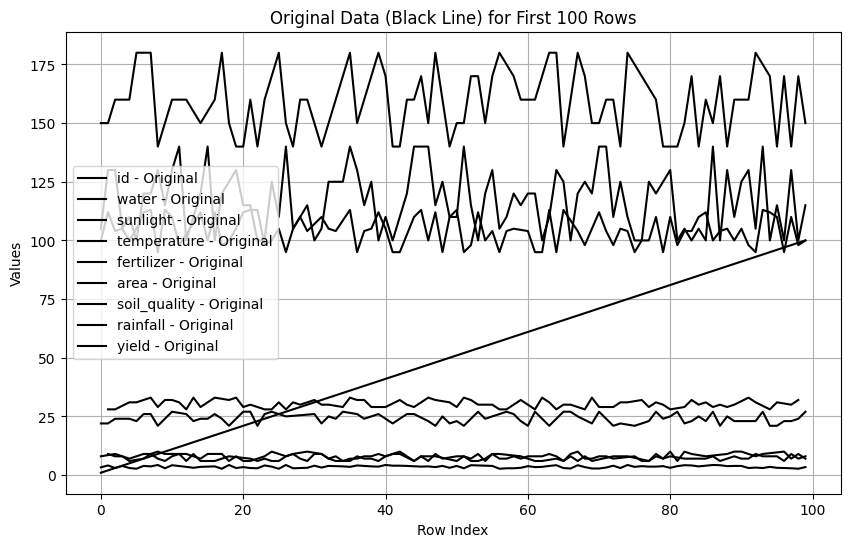

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('plant_growth_data_1000_rows.csv')

# Select only the first 100 rows
df_subset = df.head(20)

# Create a mask for missing values in the dataset
missing_values_mask = df_subset.isna()

# Plot the original data for the first 100 rows
plt.figure(figsize=(10, 6))

# Plot original values (black line)
for column in df_subset.columns:
    plt.plot(df_subset.index[~missing_values_mask[column]], df_subset[column][~missing_values_mask[column]],
             color='black', label=f'{column} - Original')

# Adding labels and title
plt.xlabel('Row Index')
plt.ylabel('Values')
plt.title('Original Data (Black Line) for First 100 Rows')

# Display legend and grid
plt.legend()
plt.grid(True)
plt.show()


Saving plant_growth_data_1000_rows.csv to plant_growth_data_1000_rows (1).csv


Saving imputed_dataset (1).csv to imputed_dataset (1) (1).csv


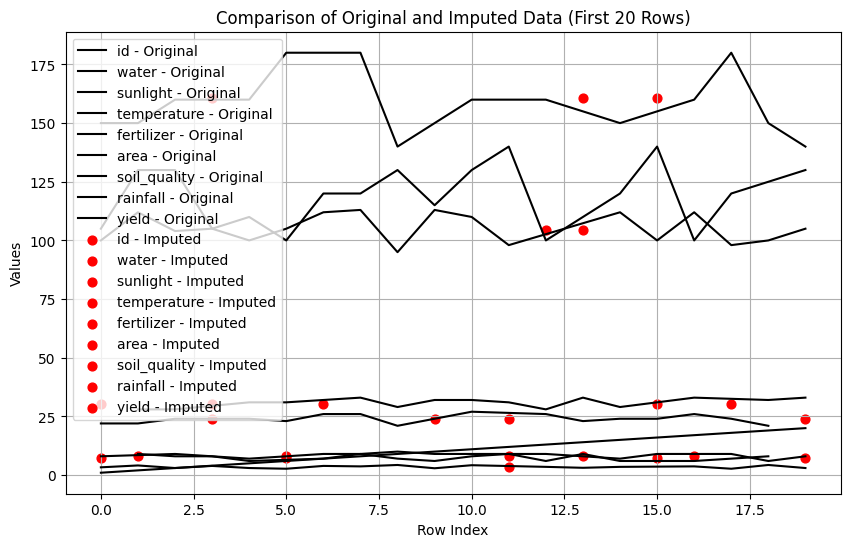

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# Upload the original dataset
uploaded = files.upload()
df_original = pd.read_csv('plant_growth_data_1000_rows.csv')  # Adjust the file name if needed

# Upload the imputed dataset
uploaded = files.upload()
df_imputed = pd.read_csv('imputed_dataset (1).csv')  # Corrected file name

# Select only the first 100 rows for comparison
df_original_subset = df_original.head(20)
df_imputed_subset = df_imputed.head(20)

# Create a mask for missing values in the original dataset
missing_values_mask_original = df_original_subset.isna()

# Plot the original data for the first 100 rows
plt.figure(figsize=(10, 6))

# Plot original values (black line)
for column in df_original_subset.columns:
    plt.plot(df_original_subset.index[~missing_values_mask_original[column]], df_original_subset[column][~missing_values_mask_original[column]],
             color='black', label=f'{column} - Original')

# Plot imputed values (red dots)
for column in df_original_subset.columns:
    # Identify the imputed (missing) values
    imputed_values_mask = missing_values_mask_original[column]
    plt.scatter(df_imputed_subset.index[imputed_values_mask],
                df_imputed_subset[column][imputed_values_mask],
                color='red', label=f'{column} - Imputed', s=40)

# Adding labels and title
plt.xlabel('Row Index')
plt.ylabel('Values')
plt.title('Comparison of Original and Imputed Data (First 20 Rows)')

# Display legend and grid
plt.legend()
plt.grid(True)
plt.show()


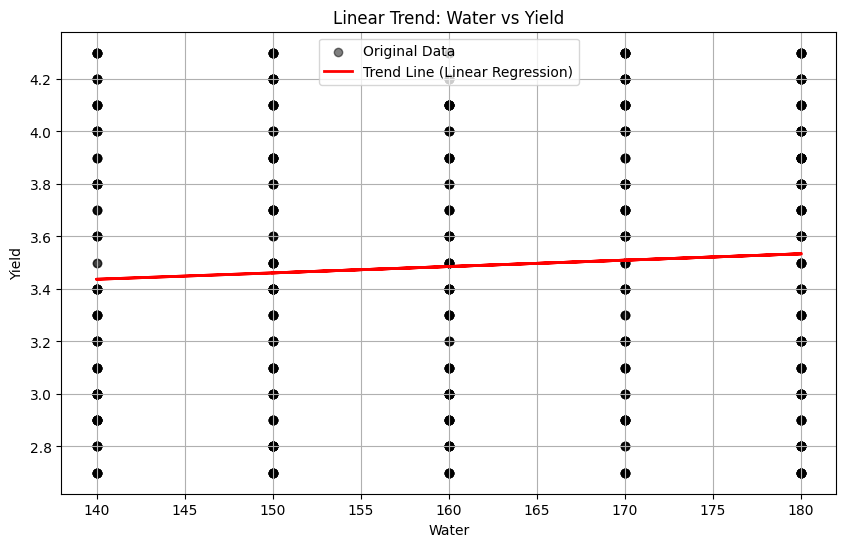

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Load the dataset
df = pd.read_csv('plant_growth_data_1000_rows.csv')

# Drop rows with NaN values in 'water' or 'yield' columns
df_clean = df.dropna(subset=['water', 'yield'])

# Select 'water' and 'yield' columns
X = df_clean[['water']]  # Independent variable (water)
y = df_clean['yield']    # Dependent variable (yield)

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the yield based on water values
y_pred = model.predict(X)

# Plot the original data points (scatter) and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['water'], df_clean['yield'], color='black', alpha=0.5, label='Original Data')
plt.plot(df_clean['water'], y_pred, color='red', linewidth=2, label='Trend Line (Linear Regression)')

# Adding labels and title
plt.xlabel('Water')
plt.ylabel('Yield')
plt.title('Linear Trend: Water vs Yield')
plt.legend()
plt.grid(True)
plt.show()

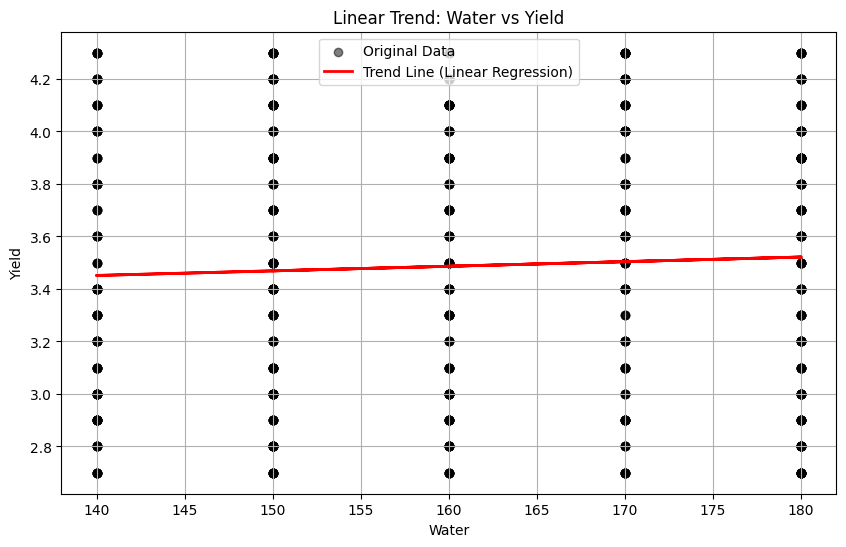

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Load the dataset
df = pd.read_csv('imputed_dataset.csv')

# Drop rows with NaN values in 'water' or 'yield' columns
df_clean = df.dropna(subset=['water', 'yield'])

# Select 'water' and 'yield' columns
X = df_clean[['water']]  # Independent variable (water)
y = df_clean['yield']    # Dependent variable (yield)

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the yield based on water values
y_pred = model.predict(X)

# Plot the original data points (scatter) and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['water'], df_clean['yield'], color='black', alpha=0.5, label='Original Data')
plt.plot(df_clean['water'], y_pred, color='red', linewidth=2, label='Trend Line (Linear Regression)')

# Adding labels and title
plt.xlabel('Water')
plt.ylabel('Yield')
plt.title('Linear Trend: Water vs Yield')
plt.legend()
plt.grid(True)
plt.show()


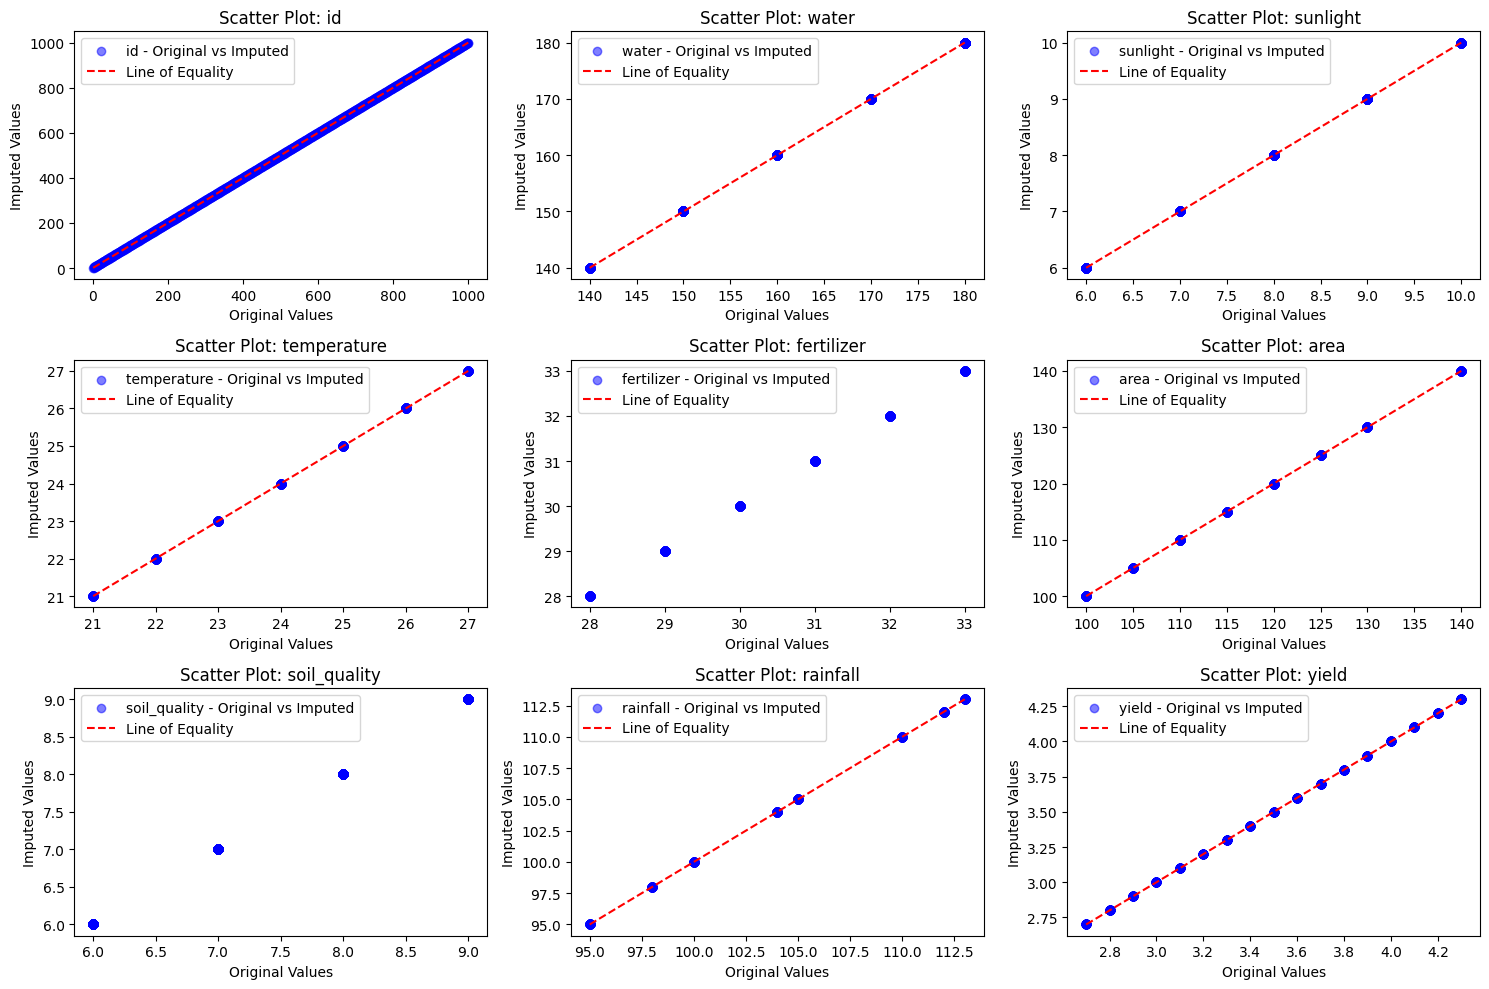

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the original and imputed datasets
df_original = pd.read_csv('plant_growth_data_1000_rows.csv')
df_imputed = pd.read_csv('imputed_dataset.csv')

# Ensure both datasets have the same shape
assert df_original.shape == df_imputed.shape, "The original and imputed datasets must have the same shape"

# List all the columns in the dataset
columns = df_original.columns

# Plotting scatter plots for each column
plt.figure(figsize=(15, 10))

for i, column in enumerate(columns, 1):
    plt.subplot(3, 3, i)  # Adjust the number of rows and columns based on the total columns
    # Get the values for the current column
    original_values = df_original[column].values
    imputed_values = df_imputed[column].values

    # Create a scatter plot comparing original and imputed values for the current column
    plt.scatter(original_values, imputed_values, alpha=0.5, color='blue', label=f'{column} - Original vs Imputed')

    # Add a line of equality (y = x) to visualize perfect correlation
    plt.plot([min(original_values), max(original_values)], [min(original_values), max(original_values)], color='red', linestyle='--', label='Line of Equality')

    # Labeling
    plt.xlabel('Original Values')
    plt.ylabel('Imputed Values')
    plt.title(f'Scatter Plot: {column}')
    plt.legend()

plt.tight_layout()
plt.show()
